# Question-1

# Section 1 & 2:Barker's Method and Two Coin Algorithm

MCMC is most often used for sampling from Bayesian posterior where the target density , π(x) is such that, π(x) ∝ π'(x), where the functional form of π'(x) is usually known. MCMC algorithm of Hastings is used in such a case where a move from x to y in a MH algorithm is accepted with probability:


$\alpha_{MH}(x,y) = min(1,\frac{\pi(y)q(y,x)}{\pi(x)q(x,y}) $

Here the normalisation constant gets cancelled in the ratio.

There also exists other acceptance probability functions such as Barker’s algorithm :

$\alpha_{B} = \frac{\pi(y)q(y,x)}{\pi(x)q(x,y)+\pi(y)q(y,x)} $


If we have Bayesian posteriors with unknown functional forms then the ratio π(y)/π(x) cannot be evaluated making it difficult to implement the MH algorithm. In such a case we can use the Bernoulli factories to avoid calculating the acceptance probability. A customised Bernoulli factory algorithm can be built to draw from events which occur with probability h(p) , given events that occur with probability p. We use acceptance probability functions other than MH (like Barker’s or Portkey algorithm) for which efficient Bernoulli factory algorithm can be constructed.

$\text{Barker's Method and Two  Coin Algorithm} $

Barker’s algorithm:

1:Draw y ∼ q(x, dy) 

2: Draw A ∼ Bern ($\alpha_{B}$($x_{m}$, y))  or Draw a U ~Uniform(0,1) and check if U< $\alpha_{B}$($x_{m}$, y)

3: if A = 1 or the above condition is true

4: $x_{m+1}$ = y 

5: if A = 0 then 

6: $x_{m+1}$ = $x_{m}$

Here if we don’t know the functional form of $\alpha_{B}$($x_{m}$, y) then a Bernoulli factory can be constructed to obtain events of probability $\alpha_{B}$($x_{m}$, y) without explicitly evaluating the function.
. One of such Bernoulli factory algorithm is : The two-coin Bernoulli factory of Gon¸calves.

Here we use : π(x)q(x, y) = $c_{x}$ $p_{x}$, where $c_{x}$ can be considered as a bound. We can calculate $c_{x}$ such that it is the upper bound of π(x)q(x, y):

π(x)q(x, y) ≤ $c_{x}$ and then set $p_{x}$ = π(x)q(x, y) /$c_{x}$

This will give :

 h($p_{x}$, py) := $c_{y}$$p_{y}$ / ($c_{x}$$p_{x}$ + $c_{y}$$p_{y}$) = $\alpha_{B}$(x, y).
 
We can easily prove that this algorithm will generate the draws for the $\alpha_{B}$(x, y) ( Assignment 2, Question 1)

The number of loops until the algorithm stops is distributed as a Geom(($c_{x}$$p_{x}$ + $c_{y}$$p_{y}$)/($c_{y}$ + $c_{x}$)), and the mean execution time is ($c_{y}$ + $c_{x}$)/ ($c_{x}$$p_{x}$ + $c_{y}$$p_{y}$).
Therefore the computational efficiency depends highly on cy and cx.

Algorithm for the step 2 in Barker's ALgorithm : Drawing A ∼ Bern ($\alpha_{B}$($x_{m}$, y))

1: Draw C1 ∼ Bern ( $c_{y}$ / ($c_{y}$ + $c_{x}$)  )

2: if C1 = 1 then

3: Draw C2 ∼ Bern($p_{y}$)
 
4: if C2 = 1 then 

5: output 1 

6: if C2 = 0 then

7: go to Step 1 

8: if C1 = 0 then

9: Draw C2 ∼ Bern($p_{x}$) 

10: if C2 = 1 then 

11: output 0 

12: if C2 = 0 then 

13: go to Step 1



# Section 3: Portkey Barker’s method

If we use the acceptance probability function :

$\alpha = \frac{\pi(y)q(y,x)}{\pi(x)q(x,y)+\pi(y)q(y,x)+d(x, y)} $

where d(x, y) = d(y, x) ≥ 0. We can construct Bernoulli factories for this algorithm which provides significant computational gains. 

One such algorithm is Portkey Barker’s acceptance probability. The Bernoulli factory algorithm for this probability can be easily constructed by modifying the two-coin algorithm ,introducing a first step that allows immediate rejections with probability 1 − β.

For Portkey Barker's the acceptance probability is given by:

$\alpha_{\beta} = \frac{\pi(y)q(y,x)}{\pi(x)q(x,y)+\pi(y)q(y,x)+\frac{1-\beta}{\beta}({c_{x}}+{c_{y}})} $

Algorithm : Portkey two-coin algorithm

1: Draw S ∼ Bernoulli(β)

2: if S = 0 then

3: output 0

4: if S = 1 then

5: Follow steps 1 to 12 from two coin algorithm for Barker's

6: if C2 = 0 then 

7: go to Step 1 (Draw Draw S ∼ Bernoulli(β) )










The number of loops until the algorithm stops is distributed as $ Geometric(s_{\beta}) $ :



 $ s_{\beta}=(1-\beta) + \beta \frac{ c_{y} p_{y} + c_{x}p_{x} } { c_{x}+c_{y} }  $


# Section 4: Flipped portkey two-coin algorithm

This is used when the lower bound for π(x)q(x, y) can be calculated easier in comparison to upper bound. We can then calculate the upper bound for $\pi(x)^{-1}q(x,y)^{-1}$ and proceed in a similar fashion as in Portkey method.

$\pi(x)^{-1}q(x,y)^{-1} = \tilde{c_{x}}\tilde{p_{x}} \\ $ 

$d(x,y):= \tilde{d}(x,y)=\frac{(1-\beta)}{\beta}\frac{(\tilde{c_{x}}+\tilde{c_{y}})}{\tilde{c_{x}}\tilde{p_{x}}\tilde{c_{y}}\tilde{p_{y}}}$

$\alpha_{f(B)}(x,y)=\frac{ \tilde{c_{x}} \tilde{p_{x}} } { \tilde{c_{x}}\tilde{p_{x}}+\tilde{c_{y}} \tilde{p_{y}}+\frac{1-\beta}{\beta}(\tilde{c_{x}}+\tilde{c_{y}})}$


Algorithm:

1: Draw S ∼ Bernoulli(β)

2: if S = 0 then

3: output 0

4: if S = 1 then

5: Draw C1 ∼$ Bern\frac{\tilde{c_{x}}}{\tilde{c_{x}} + \tilde{c_{y}}}$

6: if C1 = 1 then

7: Draw C2 ∼ Bern($\tilde{p_{x}}$)

8: if C2 = 1 then

9: output 1

10: if C2 = 0 then

11: go to Step 1

12: if C1 = 0 then

13: Draw C2 ∼ Bern($\tilde{p_{y}}$)

14: if C2 = 1 then

15: output 0

16: if C2 = 0 then

17: go to Step 1

# Question - 2

Given θ|λ ∼ Weibull(λ, k), proposal distribution : $Normal(\theta_{i-1},0.001)$, Since proposal distribution is symmetric and is a random walk, q(x,y)=q(y,x). We try to find upper bound for π(θ|λ). 

π(θ|λ) ≤ k/(eθ) :=$c_{θ}$ (upper bound)

π(θ) =$c_{θ}$ · π(θ)/$c_{θ}$;   $p_{θ}$ = π(θ)/$c_{θ}$

We draw  λ ∼ ν in each iteration of the bernoulli factory algorithm,setting ν = Gamma(10, 100) and k = 10.

We will use π(θ|λ), $c_{θ}$ and $p_{θ}$ in Barker's and Portkey Barker's  Algorithm and compare the plots.


In [235]:
using Statistics
using Distributions
using Plots
using SpecialFunctions
using StatsPlots
using StatsBase

In [236]:
# portkey barker method
function port(b,k,Num,samp)

accept=0

for i in 2:num
    samp[i]=rand(Normal(samp[i-1],sqrt(0.001)),1)[1]
         if(samp[i]<0)
                samp[i]=samp[i-1]
                continue
            end
#     lamb=rand(Gamma(10,1/100))
    cx=k/(exp(1)*samp[i-1])
    cy=k/(exp(1)*samp[i])
#     px=(pdf(Weibull(k,lamb),samp[i-1]))/cx
#     py=(pdf(Weibull(k,lamb),samp[i]))/cy
    
   while(true)
   

    s=rand(Binomial(1,b))
    if(s==0)
                samp[i]=samp[i-1]
                break
    else
                c1=rand(Binomial(1,(cy/(cx+cy))))
                   if (c1==1)
                    lamb=rand(Gamma(10,1/100))
                    py=(pdf(Weibull(k,lamb),samp[i]))/cy
                     c2=rand(Binomial(1,py))
                     if (c2==1) 
                        accept=accept+1
                         break
                     end
                 
                   elseif (c1==0)
                    lamb=rand(Gamma(10,1/100))
                    px=(pdf(Weibull(k,lamb),samp[i-1]))/cx
                     c2=rand(Binomial(1,px))
                     if(c2==1) 
                       samp[i]=samp[i-1]
                        break
                     end
                 
                   end
                 
   end
            
  end
        
                
end
    
    return accept
            
end
                          
    

port (generic function with 2 methods)

In [237]:
num=10000
k=10
lamb=rand(Gamma(10,1/100))
samp1=rand(Weibull(k,lamb))

samp_port=zeros(num,1)
samp_port[1]=samp1;

0.4119


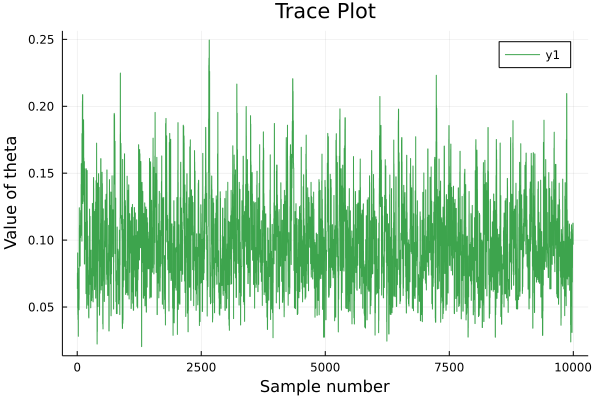

In [238]:
# beta=1
println(port(1,k,num,samp_port)/num)
plot((samp_port),color=3,xlabel="Sample number",ylabel="Value of theta",title="Trace Plot")


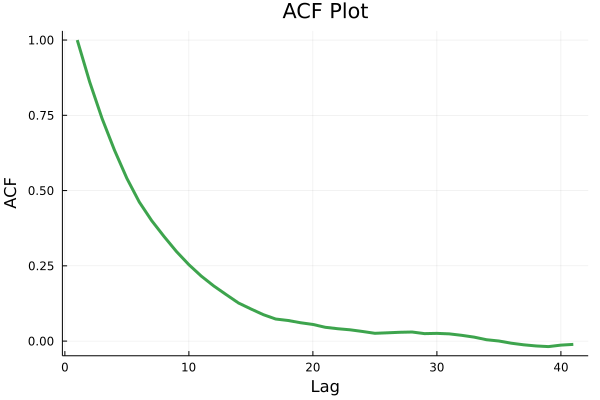

In [239]:
plot(autocor(samp_port),lw=3,color=3,label="",xlabel="Lag",ylabel="ACF",title="ACF Plot")

0.3864


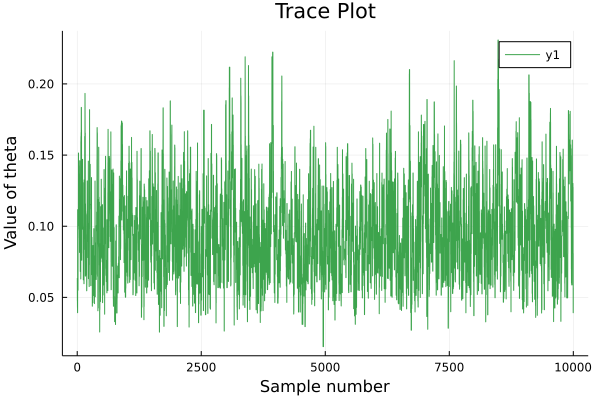

In [240]:
# beta=0.99
println(port(0.99,k,num,samp_port)/num)
plot((samp_port),color=3,xlabel="Sample number",ylabel="Value of theta",title="Trace Plot")

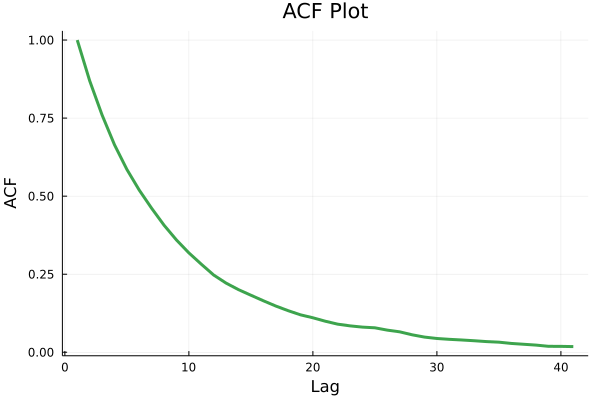

In [241]:
plot(autocor(samp_port),lw=3,color=3,label="",xlabel="Lag",ylabel="ACF",title="ACF Plot")

0.1585


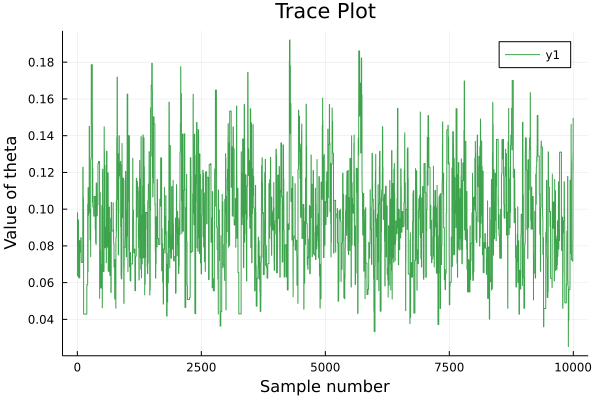

In [242]:
# beta=0.75
println(port(0.75,k,num,samp_port)/num)
plot((samp_port),color=3,xlabel="Sample number",ylabel="Value of theta",title="Trace Plot")

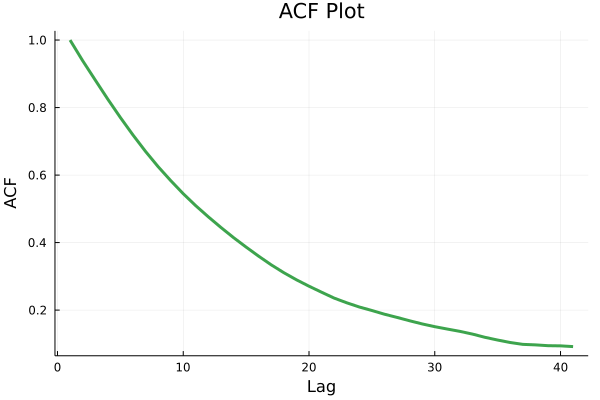

In [243]:
plot(autocor(samp_port),lw=3,color=3,label="",xlabel="Lag",ylabel="ACF",title="ACF Plot")

0.0742


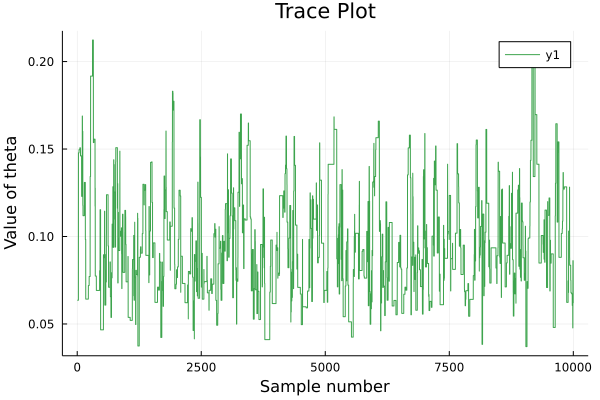

In [244]:
# beta=0.5
println(port(0.5,k,num,samp_port)/num)
plot((samp_port),color=3,xlabel="Sample number",ylabel="Value of theta",title="Trace Plot")

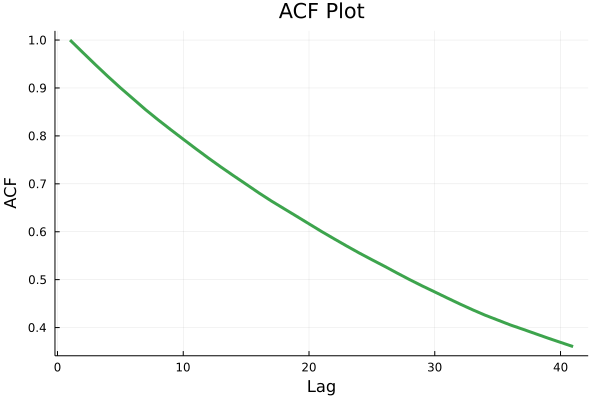

In [245]:
plot(autocor(samp_port),lw=3,color=3,label="",xlabel="Lag",ylabel="ACF",title="ACF Plot")

0.0194


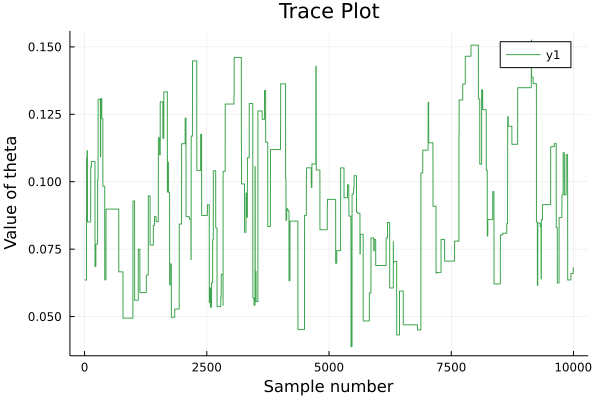

In [246]:
# beta=0.2
println(port(0.2,k,num,samp_port)/num)
plot((samp_port),color=3,xlabel="Sample number",ylabel="Value of theta",title="Trace Plot")

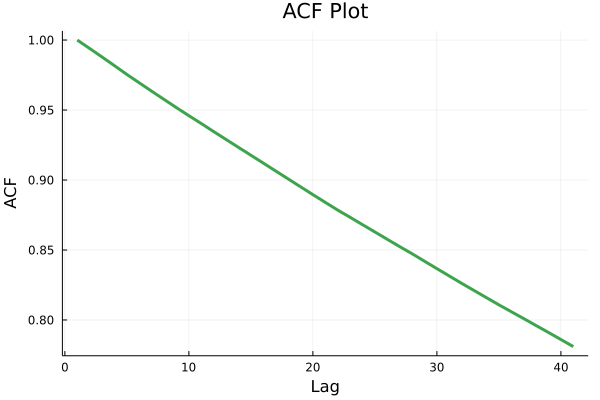

In [247]:
plot(autocor(samp_port),lw=3,color=3,label="",xlabel="Lag",ylabel="ACF",title="ACF Plot")